## Introduction:

### 1.1 Context
House hunting in Lagos can be a very frustrating process. From being shown houses with ridiculously small spaces to being asked to pay outrageous prices for those spaces, the entire process can be very time-consuming and demoralizing. The prices of houses are a major problem, especially when you don't know what to expect.

This notebook explores the factors that influence rental prices in Lagos, Nigeria. Using a dataset of property features, we will build a predictive model that can estimate rental prices. This will help landlords, tenants, and real estate enthusiasts make informed decisions in the Lagos rental market.

### 1.2 Data Features
The data for this analysis was gotten from Kaggle, which was originally scrapped from property.pro.ng, a webpage that provides information for houses available for rent in Nigeria. Here is what the data looks like:

* Title: Title of the property e.g. Brand New 5 Bedroom Semi-Detached Duplex
* More Info: More Information about the property e.g. 4 BEDROOM HOUSE FOR RENT
* City: City where the property is located e.g. Lekki
* Neighborhood: Where the property is located e.g. Osapa London
* Serviced: Whether the property has been serviced e.g. sockets have been installed or other renovations.
* Newly Built: Whether the property was newly built
* Furnished: Whether the property has been furnished
* Bedrooms: Number of bedrooms on the property
* Bathrooms:Number of bathrooms on the property
* Toilets: Number of toilets on the property
* Price: The price of the property


### 1.3 Pre-Requsities
For this project we would be making use of several libraries, the first set being the usual libraries, Numpy,Pandas for manipulating data and seaborn and Matplotlib for visualization. Then we would be importing several libraries from sklearn for prediction. Some of the basic ones we would be using are; RandomForest Regressor, Ridge Regressor, DecisionTreeRegressor, Lasso Regressor, etc.
The several  model: 
  
 NB: Any model not stated in the original library importation field would be explained as we go

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML library
import sklearn

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

## 2.0  Data Wrangling

Here we would be looking at the following:
* Loading the data.
* Taking out commercail locations in the dataset
* Dropping unneeded columns(Title and More info column)
* Handling the numeric columns; Price, Bedrooms, Bathrooms, Toilets
* Getting the statistics of the dataset
* Exploring the statistics of the data.

### 2.1 Loading the data.

In [2]:
# Reading the data file
df = pd.read_csv('lagos-rent_renewed.csv')
df.head(5)

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


### 2.2 Dropping Rows with Non-residential Addresses
For this analysis we are more concerned with just residential buildings, so we will be dropping rows that include details for commerical buildings, church, office space, conferences, schools, and even lands.

In [3]:
# Locating non-residential building in the dataset
commercial_locations= df[df['More Info'].str.contains('COMMERCIAL|WAREHOUSE|CONFERENCE|LAND|CHURCH|EVENT CENTRE|WORKING SPACE|SCHOOL|OFFICE', case=False)]
df = df.drop(commercial_locations.index, axis=0)
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


### 2.3 Removing unwanted columns

Details in the Title and More Info column are already summarised in the Neighborhood column, thus we have no use for those two columns, we will be dropping them.

In [4]:
# Droping the Title and More Info column as they are not reqiured for this analysis(a repeat)
df = df.drop(['Title', 'More Info'], axis=1)
df.head(5)

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,"5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,"4,000,000",1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


### 2.4 Cleaning the Numeric Columns

The Price, Bedrooms, Bathrooms and Toilets column contain string variables which are not useful for our ML model, also, they are all object type. We will be extracting just the numberic values from these columns, and converting their type to integers.

In [5]:
# Converting the Price column to integers

# Extracting the numeric values in the columns
df['Bedrooms']= df['Bedrooms'].str.extract(r'(\d+) beds')
df['Toilets']= df['Toilets'].str.extract(r'(\d+) Toilets')
df['Bathrooms']= df['Bathrooms'].str.extract(r'(\d+) baths')
df['Price']= df['Price'].str.extract(r'([\d,]+)')

# Removing the comma seperators from the price column
df['Price']= df['Price'].str.replace(',', '')
                                                                    
df.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,5000000,0,1,0,4,4,5,Lekki,Agungi
1,5000000,0,1,0,4,4,5,Lekki,Other Lekki
2,3500000,1,0,0,2,3,3,Lekki,Osapa London
3,2700000,1,1,0,2,3,3,Lekki,Ologolo
4,4000000,1,0,0,4,5,5,Lekki,Chevron


In [6]:
# Checking for NA values
df.isna().sum()

Price              0
Serviced           0
Newly Built        0
Furnished          0
Bedrooms         731
Bathrooms       1482
Toilets         1652
City               0
Neighborhood       0
dtype: int64

#### Observation:

There appears to be null values in the bedrooms,bathroom, and toilets column. We will be dropping all NA rows.

###### Dropping rows with na values

In [7]:
# Dropping NA values in the columns
df.dropna(subset=['Bedrooms', 'Toilets','Bathrooms' ], inplace=True)
df.isna().sum()

Price           0
Serviced        0
Newly Built     0
Furnished       0
Bedrooms        0
Bathrooms       0
Toilets         0
City            0
Neighborhood    0
dtype: int64

In [8]:
# Changing the datatypes for the columns
data_types = {
    'Price': int,
    'Bedrooms': int,
    'Bathrooms': int,
    'Toilets': int
}

df= df.astype(data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50045 entries, 0 to 53069
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         50045 non-null  int64 
 1   Serviced      50045 non-null  int64 
 2   Newly Built   50045 non-null  int64 
 3   Furnished     50045 non-null  int64 
 4   Bedrooms      50045 non-null  int64 
 5   Bathrooms     50045 non-null  int64 
 6   Toilets       50045 non-null  int64 
 7   City          50045 non-null  object
 8   Neighborhood  50045 non-null  object
dtypes: int64(7), object(2)
memory usage: 3.8+ MB


We have now succefully cleaned up the affected columns.

### 2.5 Checking the Overall Statistics of the Dataset

In [9]:
df.describe()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets
count,5.004500e+04,50045.000000,50045.000000,50045.000000,50045.000000,50045.000000,50045.000000
mean,4.413863e+07,0.213368,0.290898,0.118573,2.430393,2.289220,2.707263
std,7.602166e+09,0.409689,0.454181,0.323289,1.448520,1.611444,1.891613
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000e+05,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2.000000e+06,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000
75%,4.500000e+06,0.000000,1.000000,0.000000,3.000000,3.000000,4.000000
max,1.700000e+12,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000


#### Observations
- The median rent price is 2 million naira.
- There maximum rent price is over 17 billion naira(A bit unrealistic, given the context of lagos)
- The minimum rent price on the other hand is one(1)naira, also very unrealistic
- Houses have as many as 10bedrooms, and as little as no bedrooms at all, same can be seen for toilets and bathrooms.

### 2.6 Handling outliers in the data set
We will be taking out outlines in the numeric columns; Price,Bedrooms,Bathrooms and Toilets.

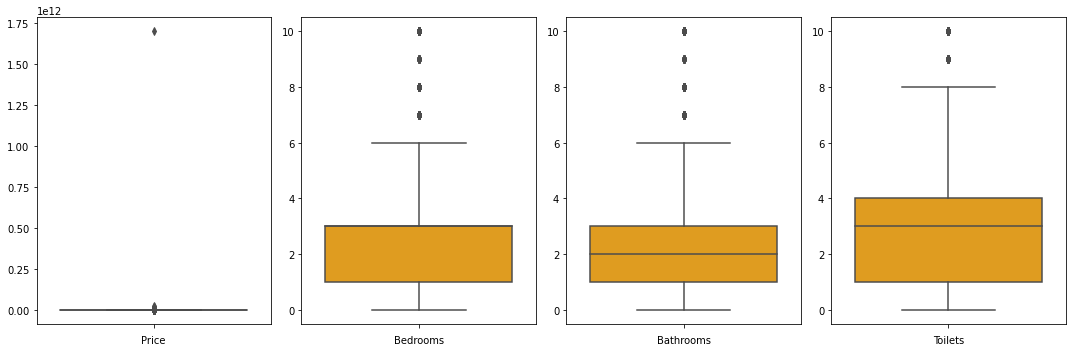

In [10]:
# Checking for outliers
Numerical_columns = ['Price','Bedrooms','Bathrooms', 'Toilets']
fig, axarr = plt.subplots(1, 4, figsize=(15, 5))
n = 0

for j in Numerical_columns:
    ax = axarr[n]
    sns.boxplot(y=df[j], color='orange', ax=ax)
    ax.set_xlabel(j)
    ax.set_ylabel("")
    n += 1

plt.tight_layout()
plt.show()

#### Observation
The dataset contains a number of outliers in the price, bedrooms, bathroom and toilet column. To handle this, we will be using the Interquartile range formula(IQR).

In [11]:
#Defining a function to take out outliers
def remove_outlier(data):
    '''
    This function returns the total outliers in a dataset column, and replaces the upper and lower outliers
    using the Interquartile Range (IQR) Method.
    data = df['columns']
    '''
    #calculationg the third quartile of the column
    Q3 = data.quantile(0.75)
    
    #Calculating the First quartile of the column
    Q1 = data.quantile(0.25)
    
    #Calculating the Interquartile range
    IQR = Q3 - Q1
    
    # Identifying the lower outliers
    lower_limit = round(Q1 - 1.5 * IQR)
    
    #Identifying the upper outliers
    upper_limit = round(Q3 + 1.5 * IQR)
    
    #Replacing the lower outliers with the lower IQR value
    data.loc[data> upper_limit] = upper_limit
    
    #Replacing the upper outliers with the lower IQR value
    data.loc[data<lower_limit] = lower_limit
    
    return data

In [12]:
#Removing the outliers in each column
df['Price'] = remove_outlier(df['Price'])
df['Bedrooms'] = remove_outlier(df['Bedrooms'])
df['Bathrooms'] = remove_outlier(df['Bathrooms'])
df['Toilets'] = remove_outlier(df['Toilets'])

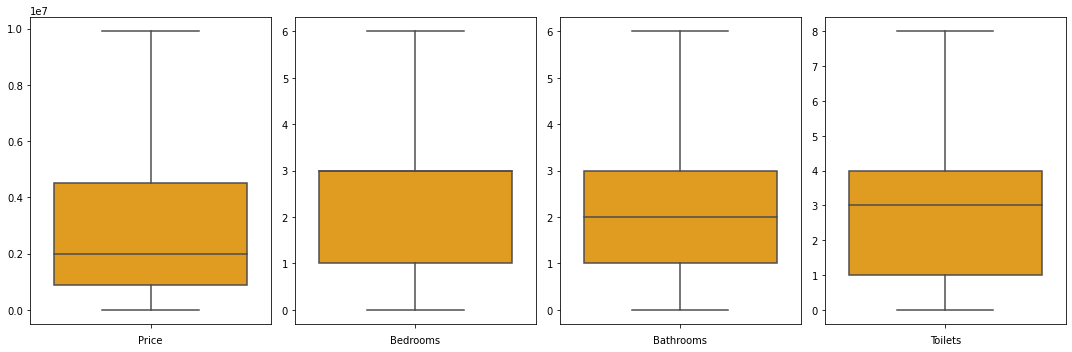

In [13]:
# Checking for outliers
Numerical_columns = ['Price','Bedrooms','Bathrooms', 'Toilets']
fig, axarr = plt.subplots(1, 4, figsize=(15, 5))
n = 0

for j in Numerical_columns:
    ax = axarr[n]
    sns.boxplot(y=df[j], color='orange', ax=ax)
    ax.set_xlabel(j)
    ax.set_ylabel("")
    n += 1

plt.tight_layout()
plt.show()

We have how succefull removed outliers from the columns. From the box plot displayed we can already get a view on the distribution of our data. For more clarity, we will plot a histogram.

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Serviced'}>,
        <AxesSubplot:title={'center':'Newly Built'}>],
       [<AxesSubplot:title={'center':'Furnished'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'Bathrooms'}>],
       [<AxesSubplot:title={'center':'Toilets'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

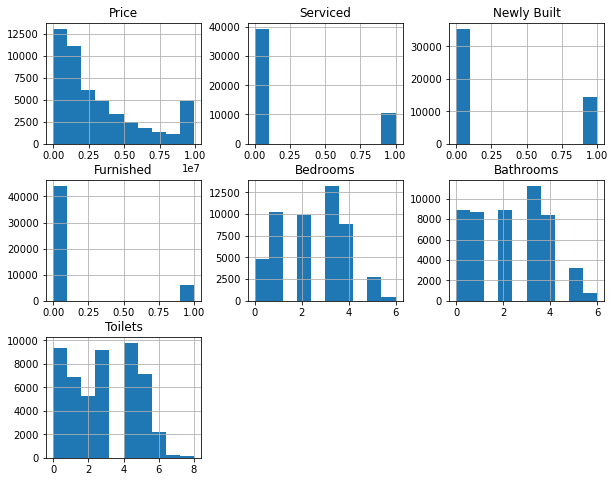

In [14]:
# Checking the distribution of our datasets
df.hist(figsize =(10, 8))

#### Observations:
Our columns are mostly negatively skewed. However, more concerning is the price distribution. While we have handled outliers, it seems there are more loctions with very unrealistic prices. To ensure our data functions as expected, we would treat this.


##### Cleaning the price column

In [15]:
#Identifying the minimum price in the datasets
min_price=df['Price'].min()
max_price = df['Price'].max()
print(f' The minimum cost for rent in the dataset is {min_price}naira')
print(f' The maximum cost for rent in the dataset is {max_price}naira')

 The minimum cost for rent in the dataset is 1naira
 The maximum cost for rent in the dataset is 9900000naira


It is unrealistic that the minimum cost of rent in lagos is below hundred thousand naira(100,000) per annum. Thus, we would be removing all rows with rent price lower than 100,000.

In [16]:
#Taking out rows with unrealistic prices
Too_cheap_price = df[(df['Price'] <100000)].index
df = df.drop(Too_cheap_price, axis=0)
df.head()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,5000000,0,1,0,4,4,5,Lekki,Agungi
1,5000000,0,1,0,4,4,5,Lekki,Other Lekki
2,3500000,1,0,0,2,3,3,Lekki,Osapa London
3,2700000,1,1,0,2,3,3,Lekki,Ologolo
4,4000000,1,0,0,4,5,5,Lekki,Chevron


In [17]:
# Getting the overall information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49835 entries, 0 to 53069
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         49835 non-null  int64 
 1   Serviced      49835 non-null  int64 
 2   Newly Built   49835 non-null  int64 
 3   Furnished     49835 non-null  int64 
 4   Bedrooms      49835 non-null  int64 
 5   Bathrooms     49835 non-null  int64 
 6   Toilets       49835 non-null  int64 
 7   City          49835 non-null  object
 8   Neighborhood  49835 non-null  object
dtypes: int64(7), object(2)
memory usage: 3.8+ MB


## 3.0 Exploratory Data Analysis(EDA)
For the EDA analysis we will be looking at the following details:

- The average cost of rent in major locations in Lagos
- The cheapest locations in lagos
- The most expensive locations in lagos
- Average cost of rent in these locations(expensive and cheap)
- The avarage cost of rent for one bedroom and 2 bedroom flats in these locations (This is a common ask for house seekers in Lagos).
- The cost of furnished and unfurnished apartments in cheap and expensive locations.
- The cost of serviced and unserviced appartments in cheap and expensive locations.
- The cost of newly built house and old houses in the cheap and expensive locations in lagos.
- Estimating the relationship between the variables in the data set

**NB**: For futher analysis, we will be converting the serviced,furnished and newly built columns to object data types, this will enable us perform specific analysis, after which they'll be converted back to integres.

In [18]:
# Changing the datatypes for the columns
data_types = {
    'Serviced': object,
    'Newly Built': object,
    'Furnished': object,
}

df= df.astype(data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49835 entries, 0 to 53069
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         49835 non-null  int64 
 1   Serviced      49835 non-null  object
 2   Newly Built   49835 non-null  object
 3   Furnished     49835 non-null  object
 4   Bedrooms      49835 non-null  int64 
 5   Bathrooms     49835 non-null  int64 
 6   Toilets       49835 non-null  int64 
 7   City          49835 non-null  object
 8   Neighborhood  49835 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


### 3.1 Checking the average cost of rent in popular cities in Lagos

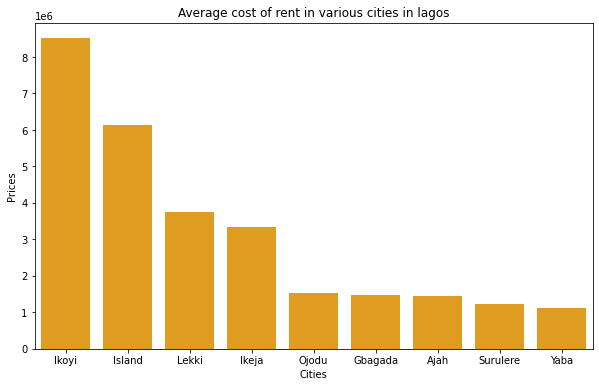

,City,Price
0,Ikoyi,8515993.33
1,Island,6143740.96
2,Lekki,3744023.02
3,Ikeja,3337592.71
4,Ojodu,1516381.60
5,Gbagada,1469251.67
6,Ajah,1460953.08
7,Surulere,1219872.47
8,Yaba,1105711.95


In [19]:
# Grouping the cities by the average prices
cities = df.groupby('City')['Price'].mean().round(2).sort_values(ascending= False).reset_index()

#Visualizing the cities
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Price', data= cities, color='Orange')

# Customize the plot
plt.xlabel('Cities')
plt.ylabel('Prices')
plt.title('Average cost of rent in various cities in lagos')


# Show the plot
plt.show()
cities

#### Observations:
The plot shows clearly that locations like Ikoyi, Island,Lekki and Ikeja are are more expensive locations in lagos in terms of rent prices. The most expensive location is Ikoyi, with an average of about 8.5 million naira for annual rent, while yaba seems to be be the cheapest location, and has an average rent cost of about 1.5 million naira, over 7 million difference from the most expensive location.

To get better insight from the analysis, we will be spliting the locations into cheap and expensive locations. From the plot, we can easily create this divide. Thus, **Cheap locations** in the dataset will include Ojodu cities, Gbagada, Ajah, Surulere and Yaba. **Expensive locations** will include Ikoyi, Island, Lekki and Ikeja.

### 3.2 Cheapest Locations in Lagos

In [20]:
# Isolating the cheap cities in the dataset
cheap_houses = df[df['City'].str.contains('Ojodu|Gbagada|Ajah|Surulere|Yaba', case=False)]

#Ranking the locations by rent prices
cheap_locations = cheap_houses.sort_values(by='Price', ascending=False)[['Neighborhood', 'Price']]

print(f'The average cost of rent in cheap locations is: {cheap_locations.mean().round(2)}')
print(f'Top 10 cheapest location in Lagos are: \n{cheap_locations.tail(10)}')

The average cost of rent in cheap locations is: Price    1359512.17
dtype: float64
Top 10 cheapest location in Lagos are: 
         Neighborhood   Price
46971      Other Ajah  120000
38515           Aguda  120000
38470  Other Surulere  120000
43537      Other Ajah  120000
38366           Aguda  120000
52889           Onike  108000
52024           Akoka  100000
34895           Ifako  100000
50779           Akoka  100000
52023           Akoka  100000


##### Vizualizing the Data

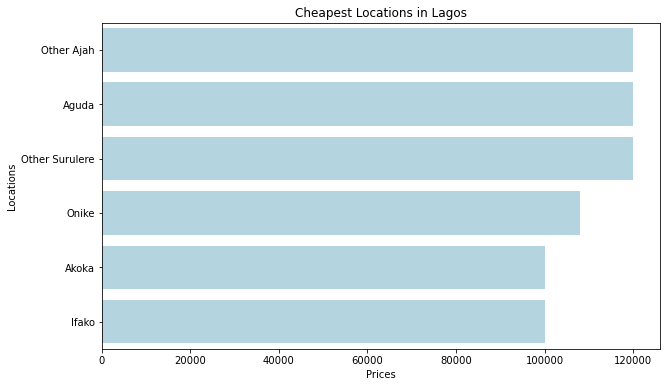

In [21]:
# Getting the locations with the cheapest rent prices
top_10_cheapest = cheap_locations.tail(10)

# Ploting a barchart to vizualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Neighborhood', data=top_10_cheapest, color='lightblue')

# Customize the plot
plt.xlabel('Prices')
plt.ylabel('Locations')
plt.title('Cheapest Locations in Lagos')

# Show the plot
plt.show()


#### Observation:
- From the data we can see that the average cost of rent in cheap location is about 1.3 million naira
- The cheapest locations in lagos include cities like ifako, akoka, some parts of surulere, and some parts of Ajah


### 3.3 Expensive Locations in Lagos
As mentioned earlier, expensive locations will include Ikoyi,Island, Ikeja, and Lekki

In [22]:
# Isolating expensive locations in the dataset
Expensive_houses = df[df['City'].str.contains('Ikoyi|Island|Lekki|Ikeja', case=False)]

# Ranking the locations by the average price
Expensive_locations = Expensive_houses.sort_values(by='Price', ascending=False)[['Neighborhood', 'Price']]

# Printing out the values
print(f'The average cost of rent in Expensive locations is: {Expensive_locations.mean().round(2)}')
print(f'The most expensive locations in Lagos are: \n {Expensive_locations.head(10)}')

The average cost of rent in Expensive locations is: Price    4600407.8
dtype: float64
The most expensive locations in Lagos are: 
         Neighborhood    Price
20960      Old Ikoyi  9900000
20738    Other Ikoyi  9900000
20740  Banana Island  9900000
20741  Banana Island  9900000
20742  Banana Island  9900000
4636   Lekki Phase 1  9900000
4635   Lekki Phase 1  9900000
20743      Old Ikoyi  9900000
20746  Banana Island  9900000
4625   Lekki Phase 1  9900000


##### Vizualizing the data

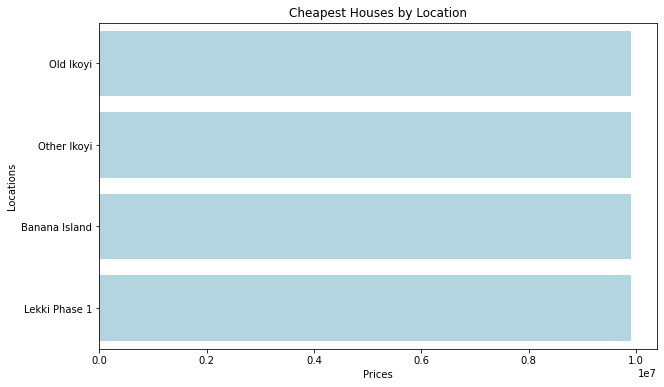

In [23]:
# Getting the locations with the most expensive rent prices
exp_10_cheapest = Expensive_locations.head(10)

# Plotting a bar chart to vizualize the data 
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Neighborhood', data=exp_10_cheapest, color='lightblue')

# Customize the plot
plt.xlabel('Prices')
plt.ylabel('Locations')
plt.title('Cheapest Houses by Location')

# Show the plot
plt.show()


#### Observations:
- The average cost of houses in expensive areas in lagos is about 4.6 million naira
- The most expensive locations in Lagos are old ikoyi, Banana Island, and Lekki phase 1. 



### 3.4 The Avarage Cost of Rent for One Bedroom and 2 Bedroom flats in These Locations

A very common ask by people looking for houses are cost of 1 bed room and 2 bed room apartments. So, to provide a good insight, we wil find the average cost of single bedroom or a two bedroom apartment in the cheap and expensive areas. This should easily give you an insight on how much to put aside when considering houses in these areas.

In [24]:
# Checking for the average cost of rent for 1 and 2 bedroom flats

#CHEAP LOCATIONS

# Filtering the data to select just 1 and 2 bedroom flats in cheap locations
Selected_bedrooms= cheap_houses[(cheap_houses['Bedrooms'] == 1) | (cheap_houses['Bedrooms'] == 2)]

# Grouping the cheap locations by the number of bedrooms, to identify the mean price
Selected_bedrooms = Selected_bedrooms.groupby('Bedrooms')['Price'].mean().round(2)

# EXPENSIVE LOCATIONS

#Filtering the data to select just 1 and 2 bedroom flats in expensive locations
sel_bedrooms= Expensive_houses[(Expensive_houses['Bedrooms']== 1) | (Expensive_houses['Bedrooms'] == 2)]

# Grouping the expensive locations by the number of bedrooms, to identify the mean price
sel_bedrooms= sel_bedrooms.groupby('Bedrooms')['Price'].mean().round(2)

#Putting our result in a table
print(f'In cheap locations,the average cost of One bedroom apartments is {Selected_bedrooms[1]}, and {Selected_bedrooms[2]} for two bedroom')
print(f'While in expensive locations, the average cost of rent for One bedroom is {sel_bedrooms[1]}, and two bedroom flats cost \n{sel_bedrooms[2]}')

In cheap locations,the average cost of One bedroom apartments is 590249.41, and 1179381.83 for two bedroom
While in expensive locations, the average cost of rent for One bedroom is 1372837.63, and two bedroom flats cost 
3325932.02


### 3.5 The Average Cost of Rent for Furnished and Unfurnished Apartments

Here we will calculate the average cost of rent for furnished and unfurnished apartment in both cheap and expensive locations.

In [25]:
# Grouping cheap locations by the furnished columns
cheap_furnished_data = cheap_houses.groupby('Furnished')['Price'].mean().round().rename({0: 'Unfurnished', 1: 'Furnished'})

# Grouping expensive locations by the furnished columns
exp_furnished_data = Expensive_houses.groupby('Furnished')['Price'].mean().round().rename({0: 'Unfurnished', 1: 'Furnished'})

# Concatinating the grouped locations
data1 = pd.concat([cheap_furnished_data, exp_furnished_data], axis=1)

# Defining the column title for the new table
data1.columns = ['Cheap_location', 'Expensive_location']

# Converting the data into a dataframe
data = pd.DataFrame(data1)

# Transposing the dataframe
data = data.transpose()
data

Furnished,Unfurnished,Furnished
Cheap_location,1363886.0,1333058.0
Expensive_location,4574472.0,4836535.0


##### vizualizing the data

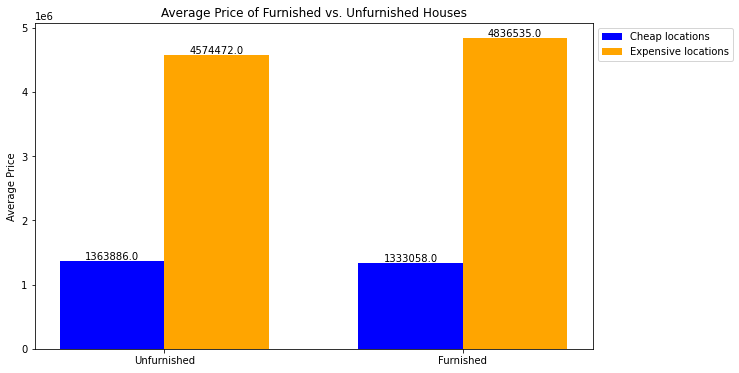

In [26]:
# Get the unique categories (furnished and unfurnished)
categories = cheap_furnished_data.index

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Calculate the x positions for the bars
x1 = range(len(categories))
x2 = [x + bar_width for x in x1]

# Generate the bar plots
plt.subplot()
plt.bar(x1, cheap_furnished_data, width=bar_width, label='Cheap locations', color='blue')
plt.bar(x2, exp_furnished_data, width=bar_width, label='Expensive locations', color='orange')

# Annotate the bars with their values
for x, y in zip(x1, cheap_furnished_data):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black')

for x, y in zip(x2, exp_furnished_data):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black')


# Customize the plot
plt.xlabel('')
plt.ylabel('Average Price')
plt.title('Average Price of Furnished vs. Unfurnished Houses')
plt.xticks([x + bar_width / 2 for x in x1], categories)
plt.legend(bbox_to_anchor=(1, 1))

#### Observation:
* The plot shows that in cheap locations, unfurnished housed cost about similar cost with furnished apartments(costing about 1.3 million naira). Interestingly, average cost for unfurnished apartments is slighlty higher than that of the furnished apartment(about 30,828 difference).

* In expensive locations,furnished appartments cost around 4.8million naira, while unfurnished apartments cost about 4.5million naira. 

* Also, furnished apartments cost about 200 thousand naira more than the general a verage cost of rent in expensive locations, which is about 4.6 million naira.


### 3.6 The Average Cost of Rent for Serviced and Unserviced Apartments

In [27]:
# Grouping the cheap location by the serviced column
cheap_serviced_data = cheap_houses.groupby('Serviced')['Price'].mean().round().rename({0: 'Unserviced', 1: 'Serviced'})

#Grouping the expensive location by the serviced column
exp_serviced_data = Expensive_houses.groupby('Serviced')['Price'].mean().round().rename({0: 'Unserviced', 1: 'Serviced'})

# Combining the data into a single table
serviced = pd.concat([cheap_serviced_data, exp_serviced_data], axis=1)

# Defining the column titles for the table
serviced.columns = ['Cheap_location', 'Expensive_location']

# Converting the table to a pandas dataframe
serviced = pd.DataFrame(serviced)

# Transposing the table
serviced = serviced.transpose()
serviced

Serviced,Unserviced,Serviced
Cheap_location,1342099.0,1559516.0
Expensive_location,4249979.0,5346581.0


##### vizualizing the data

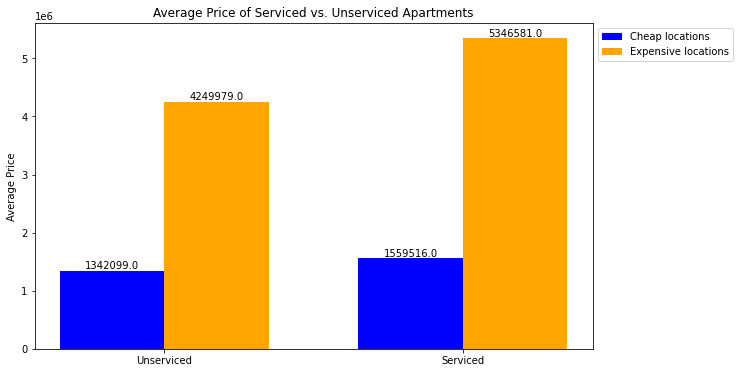

In [28]:
# Get the unique categories (serviced and unserviced)
categories = cheap_serviced_data.index

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Calculate the x positions for the bars
x1 = range(len(categories))
x2 = [x + bar_width for x in x1]


# Generate the bar plots
plt.bar(x1, cheap_serviced_data, width=bar_width, label='Cheap locations', color='blue')
plt.bar(x2, exp_serviced_data, width=bar_width, label='Expensive locations', color='orange')

# Annotate the bars with their values
for x, y in zip(x1, cheap_serviced_data):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black')

for x, y in zip(x2, exp_serviced_data):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black')


# Customize the plot
plt.xlabel('')
plt.ylabel('Average Price')
plt.title('Average Price of Serviced vs. Unserviced Apartments')
plt.xticks([x + bar_width / 2 for x in x1], categories)
plt.legend(bbox_to_anchor=(1, 1))

#### Observation
* Serviced apartments in cheap location cost about 1.5million naira on average, while unserviced appartments cost about 1.3 million naira. Also, the average cost for serviced apartments in lagos is about 200,000 more expensive than the overall average cost of rent in cheap locations, which is also about 1.3 million naira.

* Serviced apartments in expensive areas cost about 5.3 million naira on average, while unserviced location cost about 4.2 million. Serviced apartments in these areas is about 700,000 naira more than the average cost of rent in this location in general, which is about 4.6 million naira|

### 3.7 The Average Cost of Rent for Newly built and Old Apartments

In [29]:
# Grouping the cheap locations by the Newly Built column
cheap_new_house = cheap_houses.groupby('Newly Built')['Price'].mean().round().rename({0: 'Old house', 1: 'Newly Built'})

#Grouping expensive locations by the Newly Buily Column
exp_new_house = Expensive_houses.groupby('Newly Built')['Price'].mean().round().rename({0: 'Old house', 1: 'Newly Built'})

# Concatinating the tables
newly_built = pd.concat([cheap_new_house, exp_new_house], axis=1)

# Defining the column title for the table
newly_built.columns = ['Cheap_location', 'Expensive_location']

# Converting the table to a pandas dataframe
newly_built = pd.DataFrame(newly_built)

# Transposing the table
newly_built= newly_built.transpose()
newly_built

Newly Built,Old house,Newly Built
Cheap_location,1300213.0,1497433.0
Expensive_location,4480753.0,4902791.0


##### Vizualizing the data

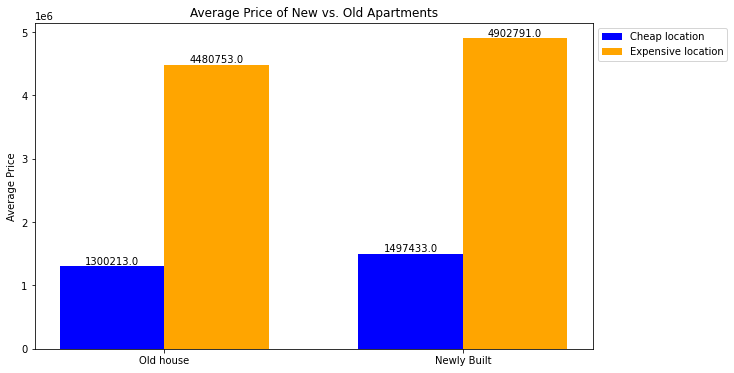

In [30]:
# Get the unique categories (No and Yes)
categories = cheap_new_house.index

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Calculate the x positions for the bars
x1 = range(len(categories))
x2 = [x + bar_width for x in x1]


# Generate the bar plots
plt.bar(x1, cheap_new_house, width=bar_width, label='Cheap location', color='blue')
plt.bar(x2, exp_new_house, width=bar_width, label='Expensive location', color='orange')

# Annotate the bars with their values
for x, y in zip(x1, cheap_new_house):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black')

for x, y in zip(x2, exp_new_house):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black')


# Customize the plot
plt.xlabel('')
plt.ylabel('Average Price')
plt.title('Average Price of New vs. Old Apartments')
plt.xticks([x + bar_width / 2 for x in x1], categories)
plt.legend(bbox_to_anchor=(1, 1))

#### Observation
* The average cost for old houses in cheap location cost is about 1.3 million naira, and newly built houses cost about 1.4 million naira, which is 100,000 naira more than the overall average cost of houses in these areas, which is also about 1.3million naira.

* In expensive areas, old houses cost about 4.4 million naira on average, and newly built houses cost about 4.9 million naira, which is about 200,000 naira more than the average cost of houses in these areas.


We are now concluded with our EDA analysis. To continue with our model, we will be converting the Serviced, Newly Built, and Furnished columns back to integr data type, examining the relationship between all the variables in the dataset, and saving out cleaned data.

In [31]:
#Removing the city column
df = df.drop(['City'], axis=1)

# Changing the data type of the Serviced, Newly Built, and Furnished columns
data_types = {
    'Serviced': int,
    'Newly Built': int,
    'Furnished': int,
}

df= df.astype(data_types)
df.head(5)

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood
0,5000000,0,1,0,4,4,5,Agungi
1,5000000,0,1,0,4,4,5,Other Lekki
2,3500000,1,0,0,2,3,3,Osapa London
3,2700000,1,1,0,2,3,3,Ologolo
4,4000000,1,0,0,4,5,5,Chevron


### 3.8 Examining the Relationship Between Variables in the Datasets
To achieve this, we will be using the pandas corr() function, and using seaborn heatmap to get a better vizualization of the correlations.

<AxesSubplot:>

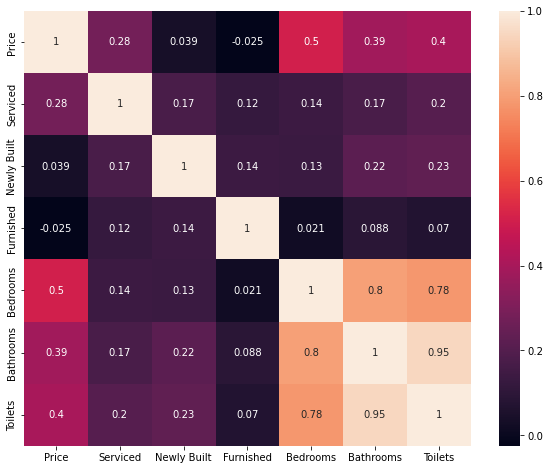

In [32]:
#Plotting a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

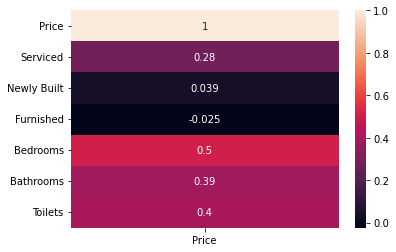

In [33]:
#Isolating just the Price row in the heatmap
Corr_matrix = df.corr()

sns.heatmap(Corr_matrix[['Price']], annot=True)

#### Observations:
The correlation shows that bedrooms have the most positive relationship with the prices, indicating that the more the number of bedrooms, the liklihood of a higher cost in rent prices. However, most of the features show a poor relationship with prices, and furnished appartment shows a negative  correlation, meaning, prices are not impacted by that feature.


Lets examine the relationship between our target variable(price) and other variables that has show a strong correlation to target variable.


<Figure size 720x576 with 0 Axes>

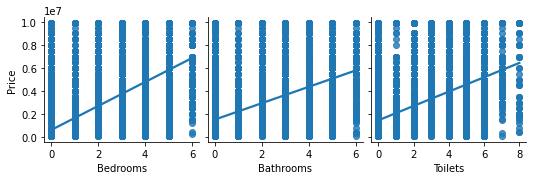

In [34]:
# Identifying positive correlated variables
columns = ['Bedrooms', 'Bathrooms', 'Toilets']

# Creating a pair plot
plt.figure(figsize=(10,8))
sns.pairplot(df, 
             x_vars=columns, 
             y_vars='Price',
             diag_kind='hist',
             kind='reg')
#Displaying the chart
plt.show()

#### Observation
All the predictor features seem to have a positive correlation with price.

NOTE: Ultimately, it is good practice to drop columns that have negative correlation, as they do not influence the target variable. However, for the sake of our proposed webpage, we'll keeo them.

W have now concluded this session of the analysis, we will proceed to save the cleaned CSV file.

In [35]:
#Saving the clean dataset
df.to_csv('Cleaned_lagos_renewed.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49835 entries, 0 to 53069
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         49835 non-null  int64 
 1   Serviced      49835 non-null  int64 
 2   Newly Built   49835 non-null  int64 
 3   Furnished     49835 non-null  int64 
 4   Bedrooms      49835 non-null  int64 
 5   Bathrooms     49835 non-null  int64 
 6   Toilets       49835 non-null  int64 
 7   Neighborhood  49835 non-null  object
dtypes: int64(7), object(1)
memory usage: 3.4+ MB


## 4.0 Data Modelling

To make predictions on our data, we will be using various regression models from Scikit-Learn. Our goal is to predict the rent prices of various houses, given the combination of several variables. For this analysis, we will evaluate our model using the R2_score. A higher R2_score indicates that our model is performing well. Ultimately, we want to achieve a model that will give us more accurate predictions.

Here are the regression models we will be using for our analysis:

- Linear Regression
- Ridge Regressor
- Lasso Regressor
- Random forest Regressor
- Gradient Boost Regressor
- Decision Tree Regressor

### 4.1 Pre-processing

- Importing important libraries
- Spliting the data into dependent and independent variables
- Splting the data into test and train dataset
- Defining the column transformer, and the standardscaler.

#### 4.1.1 Importing important libraries/models

In [37]:
# Import libraries for data splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Import specific regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Import evaluation metrics
from sklearn.metrics import r2_score

# Import pickle for saving and loading models
import pickle

#### 4.1.2 Splitting the data into dependent and independent variables

Here, Price is our dependent variable(Target), while everyother columns are the dependent variable

In [38]:
# Seperating the data into independent(x) and dependent(y) variables
x = df.drop(columns= ['Price'])
y = df['Price']

print(y.shape, x.shape)

(49835,) (49835, 7)


#### 4.1.3 Splitting the dataset into train and test data.

Here, 80% of our data will be our train data, and 20% will be the test data

In [39]:
# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

#Printing the shape of both the training and testing set to see how they've been split
print("Shape of x_Training set : ", x_train.shape)
print("Shape of x_Test set : ", x_test.shape)
print("Shape of y_Training set : ", y_train.shape)
print("Shape of y_Test set : ", y_test.shape)

Shape of x_Training set :  (39868, 7)
Shape of x_Test set :  (9967, 7)
Shape of y_Training set :  (39868,)
Shape of y_Test set :  (9967,)


#### Observation:
The train data has a total of 39,868 rows and the the test data has a total of 9,967 rows. 


#### 4.1.4 Hotencoding and Column Standardizing
The models can only read binary numbers, so it is important that the Neighborhood column is converted to string to binaries, this is achievable using the OneHotEncoder library. Also, for our numeric columns, we would be standardizing the numeric columns in our x_test data to ensure that they are of the same scale, this helps the model in predicting better.

In [40]:
#Hot encoding the location column, to make them binary, thus machine readable
column_trans = make_column_transformer((OneHotEncoder(sparse= False),['Neighborhood']),remainder='passthrough')
scaler = StandardScaler()

#### 4.1.5  LinearRegression Model

In [41]:
# Create the LinearRegression
lr = LinearRegression(n_jobs=-1)

# Create the pipeline with column transformer, scaler, and the RandomForestRegressor
pipe = make_pipeline(column_trans, scaler,lr)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
lr_y_pred = pipe.predict(x_test)

# Calculate the evaluation
r2 = r2_score(y_test, lr_y_pred)

# Print the evaluation metrics
print("R-squared score:", r2)

R-squared score: 0.6665830021644317


#### 4.1.6  Lasso Regression Model

In [42]:
# Create the LASSO
la = Lasso()

# Create the pipeline with column transformer, scaler, and the Lasso Regressor
pipe = make_pipeline(column_trans, scaler, la)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
la_y_pred = pipe.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, la_y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.6665745489449153


#### 4.1.7 GradientBoostingRegressor Model

In [43]:
# Create the GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Create the pipeline with column transformer, scaler, and the GradientBoostingRegressor
pipe = make_pipeline(column_trans, scaler, gb)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
gb_y_pred = pipe.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, gb_y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.7116069766645055


#### 4.1.8 RandomForestRegressor Model

In [44]:
# Create the RandomForestRegressor
rf = RandomForestRegressor()

# Create the pipeline with column transformer, scaler, and the RandomForestRegressor
pipe = make_pipeline(column_trans, scaler, rf)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
rf_y_pred = pipe.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, rf_y_pred)

# Print the R-squared score
print("R-squared score:", r2)


R-squared score: 0.7439503655113542


#### 4.1.9  DecisionTreeRegressor Model

In [45]:
DC=DecisionTreeRegressor()

# Create the pipeline with column transformer, scaler, and the DecisionTreeRegressor
pipe = make_pipeline(column_trans, scaler, DC)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
DC_y_pred = pipe.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, DC_y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.7303962546562266


#### 4.1.10  XGBRegressor Model

In [46]:
import xgboost as xgb

# Create the Xgboosregressor model
xgb = xgb.XGBRegressor()

# Create the pipeline with column transformer, scaler, and the XGBRegressor
pipe = make_pipeline(column_trans, scaler,xgb)

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
xgb_y_pred = pipe.predict(x_test)

# Calculate the evaluation
r2 = r2_score(y_test, xgb_y_pred)

# Print the evaluation metrics
print("R-squared score:", r2)

R-squared score: 0.75256839151081


#### Observation

The XGBRegressor model gives a better R2_score(75%) than the rest of the model, hence, it is our choice model for making the prediction. We will now proceed to saving the model.

In [47]:
#Saving the model
import pickle
pickle.dump(pipe,open('xgb_model2.pkl','wb'))
print("Model saved successfully.")

Model saved successfully.
